In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Data Network/train_dataset.csv")
test = pd.read_csv("/content/drive/MyDrive/Data Network/test_dataset.csv")

In [ ]:
train

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,23,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
31579,12,7,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
31580,18,5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
31581,8,1,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3


In [ ]:
col=[ 'IoT','LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone']
for x in col:
  list = [0,0,0,0,0,0,0]
  size=31583
  for i in range(size):
    if train[x][i]==1:
      if train['Packet delay'][i]==10 :list[0]+=1
      elif(train['Packet delay'][i]==50):list[1]+=1
      elif(train['Packet delay'][i]==60):list[2]+=1
      elif(train['Packet delay'][i]==75):list[3]+=1
      elif(train['Packet delay'][i]==100):list[4]+=1
      elif(train['Packet delay'][i]==150):list[5]+=1
      else:list[6]+=1
  print(x),print(list)

IoT
[7392, 3726, 0, 0, 0, 0, 3666]
LTE/5G
[0, 1710, 1692, 1649, 6721, 1643, 3384]
GBR
[0, 1846, 1692, 0, 5047, 0, 5349]
Non-GBR
[7392, 3590, 0, 1649, 1674, 1643, 1701]
AR/VR/Gaming
[0, 1710, 0, 0, 1647, 0, 0]
Healthcare
[1830, 0, 0, 0, 0, 0, 0]
Industry 4.0
[1821, 1846, 0, 0, 0, 0, 0]
IoT Devices
[0, 0, 0, 0, 0, 0, 1828]
Public Safety
[1886, 0, 0, 0, 0, 0, 0]
Smart City & Home
[0, 1880, 0, 0, 0, 0, 1838]
Smart Transportation
[1855, 0, 0, 0, 0, 0, 0]
Smartphone
[0, 0, 1692, 1649, 5074, 1643, 3384]


In [ ]:
col=[ 'IoT','LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone']
for x in col:
  count_1=0
  count_2=0
  count_3=0
  size=31583
  for i in range(size):
    if train[x][i]==1:
      if train['Packet Loss Rate'][i]==0.000001 :count_1+=1
      elif(train['Packet Loss Rate'][i]==0.010000):count_2+=1
      else:count_3+=1
  print(x),print(count_1,count_2,count_3)

IoT
7392 5546 1846
LTE/5G
6771 3323 6705
GBR
5070 3666 5198
Non-GBR
9093 5203 3353
AR/VR/Gaming
0 0 3357
Healthcare
1830 0 0
Industry 4.0
1821 0 1846
IoT Devices
0 1828 0
Public Safety
1886 0 0
Smart City & Home
0 3718 0
Smart Transportation
1855 0 0
Smartphone
6771 3323 3348


In [ ]:
col=[ 'IoT','LTE/5G', 'GBR', 'Non-GBR', 'AR/VR/Gaming', 'Healthcare',
       'Industry 4.0', 'IoT Devices', 'Public Safety', 'Smart City & Home',
       'Smart Transportation', 'Smartphone']
for x in col:
  count_1=0
  count_2=0
  count_3=0
  size=31583

  for i in range(size):
    if train[x][i]==1:
      if(train['slice Type'][i]==1):count_1+=1
      elif(train['slice Type'][i]==2):count_2+=1
      else:count_3+=1
  print(x, count_1,count_2,count_3)

IoT 0 7392 7392
LTE/5G 16799 0 0
GBR 8422 5512 0
Non-GBR 8377 1880 7392
AR/VR/Gaming 3357 0 0
Healthcare 0 0 1830
Industry 4.0 0 1846 1821
IoT Devices 0 1828 0
Public Safety 0 0 1886
Smart City & Home 0 3718 0
Smart Transportation 0 0 1855
Smartphone 13442 0 0


In [ ]:
ct=0;
for i in range(size):
  if train['Healthcare'][i] == 1 :
    if ct%3==0: 
      train['Packet Loss Rate'][i]=0.001000
    if ct%5==0:
      train['Packet Loss Rate'][i]=0.010000
    ct+=1

<ipython-input-9-a0000b28ee09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Packet Loss Rate'][i]=0.001000
<ipython-input-9-a0000b28ee09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Packet Loss Rate'][i]=0.010000


In [ ]:
#Healthcare packet loss rate
count_1=0
count_2=0
count_3=0
size=31583
for i in range(size):
  if train['Healthcare'][i]==1:
    if train['Packet Loss Rate'][i]==0.000001 :count_1+=1
    elif(train['Packet Loss Rate'][i]==0.001000):count_2+=1
    else:count_3+=1
print(count_1,count_2,count_3)

976 488 366


In [ ]:
ct=0;
for i in range(size):
  if train['Healthcare'][i] == 1 :
    if ct%2==0 and ct%16!=0: 
      train['Packet delay'][i]=50
    if ct%3==0 and ct%7!=0:
      train['Packet delay'][i]=75
    if ct%5==0:
      train['Packet delay'][i]=100
    ct+=1

<ipython-input-11-ee94c8277dd3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Packet delay'][i]=100
<ipython-input-11-ee94c8277dd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Packet delay'][i]=50
<ipython-input-11-ee94c8277dd3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Packet delay'][i]=75


In [ ]:
#Healthcare packet loss rate
count_1=0
count_2=0
count_3=0
count_4=0
size=31583
for i in range(size):
  if train['Healthcare'][i]==1:
    if train['Packet delay'][i]==10 :count_1+=1
    elif(train['Packet delay'][i]==50):count_2+=1
    elif(train['Packet delay'][i]==75):count_3+=1
    else:count_4+=1
print(count_1,count_2,count_3,count_4)

588 458 418 366


In [ ]:
train["PacketSize"]=np.zeros(size)

for i in range(size):
  if train["slice Type"][i] == 1:
    train["PacketSize"][i] = np.random.randint(200, 250)
  elif train["slice Type"][i] == 2:
    train["PacketSize"][i] = np.random.randint(120, 220)
  else:
    train["PacketSize"][i] = np.random.randint(50, 150)


<ipython-input-13-72869469152f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["PacketSize"][i] = np.random.randint(50, 150)
<ipython-input-13-72869469152f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["PacketSize"][i] = np.random.randint(200, 250)
<ipython-input-13-72869469152f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["PacketSize"][i] = np.random.randint(120, 220)


In [ ]:
train.rename(columns = {'Packet Loss Rate':'PacketLossRate'}, inplace = True)
train.rename(columns = {'Packet delay':'PacketDelay'}, inplace = True)
train.rename(columns = {'slice Type':'sliceType'}, inplace = True)
train

,LTE/5g Category,Time,PacketLossRate,PacketDelay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,sliceType,PacketSize
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3,100.0
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1,218.0
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1,238.0
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1,237.0
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,23,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1,210.0
31579,12,7,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,154.0
31580,18,5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,209.0
31581,8,1,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3,139.0


In [ ]:
for i in range(size):
    if(train["Healthcare"][i] == 1):

      if(train["PacketLossRate"][i] == 0.01):
        if(train["PacketDelay"][i] == 50 or train["PacketDelay"][i] == 10):
          if(train["PacketSize"][i] >= 50 and train["PacketSize"][i] <= 220):
            train["sliceType"][i] = 2
        elif(train["PacketDelay"][i] >= 75):
          if(train["PacketSize"][i] >= 120 and train["PacketSize"][i] <= 220):
              train["sliceType"][i] = 2

      elif(train["PacketLossRate"][i] == 0.001):
          if(train["PacketDelay"][i] >= 50 or train["PacketDelay"][i] < 100):
            if(train["PacketSize"][i] >= 200 and train["PacketSize"][i] <= 250):
              train["sliceType"][i] = 1
            elif(train["PacketSize"][i] >= 50 and train["PacketSize"][i] <= 200):
              train["sliceType"][i] = 1

      elif(train["PacketLossRate"][i] == 0.000001):
          if(train["PacketDelay"][i] == 10):
            if(train["PacketSize"][i] >= 50 and train["PacketSize"][i] <= 150):
              train["sliceType"][i] = 3

<ipython-input-15-94b43292726f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sliceType"][i] = 3
<ipython-input-15-94b43292726f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sliceType"][i] = 1
<ipython-input-15-94b43292726f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["sliceType"][i] = 2


In [ ]:
#Healthcare packet loss rate
count_1=0
count_2=0
count_3=0
size=31583
for i in range(size):
  if train['Healthcare'][i]==1:
    if train['sliceType'][i]==1 :count_1+=1
    elif(train['sliceType'][i]==2):count_2+=1
    else:count_3+=1
print(count_1,count_2,count_3)

488 110 1232


In [ ]:
Xmain = train[{'PacketLossRate', 'PacketDelay' , 'PacketSize'}]
Ymain = train['sliceType']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(Xmain, Ymain , test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((25266, 3), (6317, 3))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 4, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
clf.score(X_train,Y_train),clf.score(X_test,Y_test)

(0.9709095226786987, 0.9718220674370746)

In [ ]:
print(Y_pred)
print(Y_test)

[1 3 3 ... 1 3 1]
7366     1
18       3
9214     3
12282    2
27179    1
        ..
16042    1
6072     1
13330    1
31460    3
16447    1
Name: sliceType, Length: 6317, dtype: int64


In [ ]:
new_train = train.loc[train['Healthcare'] == 1]
health_index= new_train.index
health_index

Int64Index([   11,    18,    34,    62,    75,    90,    94,    95,   112,
              136,
            ...
            31298, 31308, 31328, 31338, 31372, 31414, 31438, 31497, 31553,
            31581],
           dtype='int64', length=1830)

In [ ]:
ind = Y_test.index
arr_pred = np.zeros(size)
for i in range(6317):
  arr_pred[ind[i]]= Y_pred[i]

arr_test = np.zeros(size)
for i in range(6317):
  arr_test[ind[i]] = Y_test[ind[i]]

In [ ]:
ind

Int64Index([ 7366,    18,  9214, 12282, 27179, 10701, 14485,  2017, 13210,
            11176,
            ...
            20798, 19014, 15745, 31541, 10594, 16042,  6072, 13330, 31460,
            16447],
           dtype='int64', length=6317)

In [ ]:
health_test = np.zeros(size)
health_pred = np.zeros(size)
for i in range(1830):
  health_test[health_index[i]] = arr_test[health_index[i]]
  health_pred[health_index[i]] = arr_pred[health_index[i]]

h_test = np.zeros(379)
h_pred = np.zeros(379)
j=0
for i in range(size):
  if(health_test[i] != 0):
    h_test[j] = health_test[i]
    h_pred[j] = health_pred[i]
    j=j+1

count=0
for i in range(size):
  if(health_test[i] != 0):
    count=count+1
count

379

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[3459   35    0]
 [ 143 1391    0]
 [   0    0 1289]]
              precision    recall  f1-score   support

           1       0.96      0.99      0.97      3494
           2       0.98      0.91      0.94      1534
           3       1.00      1.00      1.00      1289

    accuracy                           0.97      6317
   macro avg       0.98      0.97      0.97      6317
weighted avg       0.97      0.97      0.97      6317

0.9718220674370746


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(h_test, h_pred))
print(classification_report(h_test, h_pred))
print(accuracy_score(h_test, h_pred)*100)

[[ 70  35   0]
 [  0  24   0]
 [  0   0 250]]
              precision    recall  f1-score   support

         1.0       1.00      0.67      0.80       105
         2.0       0.41      1.00      0.58        24
         3.0       1.00      1.00      1.00       250

    accuracy                           0.91       379
   macro avg       0.80      0.89      0.79       379
weighted avg       0.96      0.91      0.92       379

90.76517150395779


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


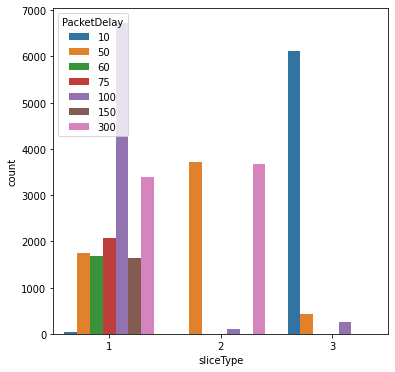

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot('sliceType',data=train,hue='PacketDelay')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


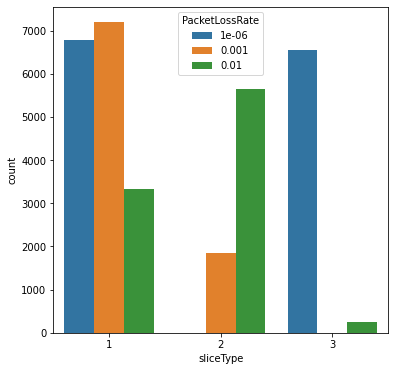

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot('sliceType',data=train,hue='PacketLossRate')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


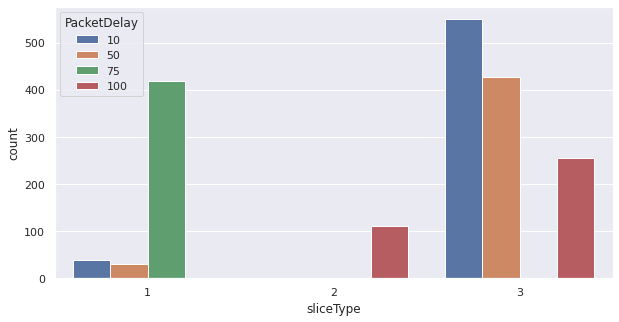

In [ ]:
plt.figure(figsize=(10,5))
sns.set()
sns.countplot('sliceType',data=new_train,hue='PacketDelay')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


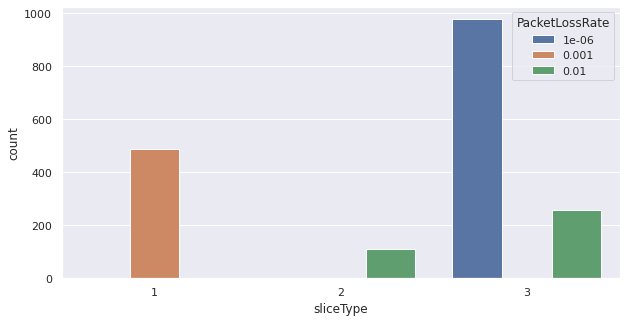

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot('sliceType',data=new_train,hue='PacketLossRate')